## Matrix Properties
### Frobenius Norm : It's quite similar to the L2 norm, the only difference being, it is calculated for a matrix instead of a vector. It is the square root of the summation of the squares of the elements present in the matrix.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf

In [2]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [3]:
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [4]:
np.linalg.norm(X) # same function as for vector L2 norm

5.477225575051661

In [5]:
X_pt = torch.tensor([[1, 2], [3, 4.]]) # torch.norm() supports floats only

In [6]:
torch.norm(X_pt)

tensor(5.4772)

In [7]:
X_tf = tf.Variable([[1, 2], [3, 4.]]) # tf.norm() also supports floats only

In [8]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

### Matrix Inversion

#### The inverse of A is A^-1 only when AA^-1 = A^-1A = I.
#### For an equation Ax = B, A = x^-1B.
#### For a  2x2 matrix ([a, b], [c,d]), swap the positions of a and d, put negatives in front of b and c, and divide everything by the determinant (ad-bc).

In [10]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [11]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [12]:
np.dot(Xinv, X)

array([[1.00000000e+00, 0.00000000e+00],
       [1.77635684e-15, 1.00000000e+00]])

In [13]:
y = np.array([4, -7])
y

array([ 4, -7])

In [14]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

Show that $y = Xw$: 

In [15]:
np.dot(X, w)

array([ 4., -7.])

In [19]:
X_pt = torch.tensor([[4, 2], [-5, -3.]])
X_pt

tensor([[ 4.,  2.],
        [-5., -3.]])

In [22]:
X_pt_inv = torch.inverse(torch.tensor([[4, 2], [-5, -3.]])) # float type
X_pt_inv

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [23]:
torch.matmul(X_pt, X_pt_inv) # like np.dot(), automatically infers dims in order to perform dot product, matvec, or matrix multiplication

tensor([[ 1.0000e+00,  0.0000e+00],
        [-4.7684e-07,  1.0000e+00]])

In [27]:
y_pt = torch.tensor([4, -7.])
y_pt

tensor([ 4., -7.])

In [29]:
w = torch.matmul(X_pt_inv, y_pt)
w

tensor([-1.,  4.])

In [31]:
X_tf = tf.Variable([[4, 2], [-5, -3.]])
X_tf

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 4.,  2.],
       [-5., -3.]], dtype=float32)>

In [33]:
X_tf_inv = tf.linalg.inv(X_tf) # also float
X_tf_inv

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.4999998,  0.9999998],
       [-2.4999995, -1.9999996]], dtype=float32)>

In [35]:
tf.matmul(X_tf, X_tf_inv)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.0000000e+00,  0.0000000e+00],
       [-4.7683716e-07,  1.0000000e+00]], dtype=float32)>

In [36]:
y_tf = tf.Variable([4, -7.])
y_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([ 4., -7.], dtype=float32)>

In [39]:
tf.linalg.matvec(X_tf_inv, y_tf)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.9999995,  3.999999 ], dtype=float32)>

#### Matrix inverse can be calculated only if the matrix is not Singular i.e. all the columns of the matrix are linearly independent.
#### If the matrix is Singular the determinant of the matrix becomes 0, and we can't divide anything by 0, hence matrix can't be calculated.

### Matrix Inversion Where No Solution

In [40]:
X = np.array([[-4, 1], [-8, 2]])
X

array([[-4,  1],
       [-8,  2]])

In [44]:
# Uncommenting the following line results in a "singular matrix" error
# Xinv = np.linalg.inv(X)

### Diagonal Matrices

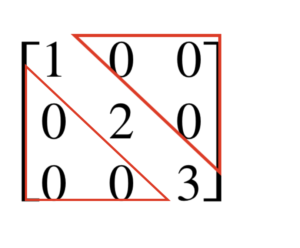

#### Non zero elements along the main diagonal, zeroes everywhere else. Identity matrix is an example of a diagonal matrix.
1) If the diagonal matrix is square diag(x) represents a vector x which contains all the elements of the main diagonal.<br>
2) Diagonal matrices are computationally very efficient. diag(x)y = Dot product of x and y. <br>
3) None of the elements on the main diagonal can be 0. <br>
4) Inverse of diag(x) = $diag[1/x1, 1/x2 ..... 1/xn]^T$

In [49]:
x = np.array([[3, 0], [0, 4]])
x

array([[3, 0],
       [0, 4]])

In [51]:
y = np.array([[5, 6]])
y

array([[5, 6]])

In [53]:
np.diagonal(x)

array([3, 4])

In [64]:
np.dot(np.array([np.diagonal(x)]), y.T)

array([[39]])

In [66]:
Xinv = np.linalg.inv(x)
Xinv

array([[0.33333333, 0.        ],
       [0.        , 0.25      ]])

In [68]:
Xinv2 = np.array([[1/3, 0], [0, 1/4]]).T
Xinv2

array([[0.33333333, 0.        ],
       [0.        , 0.25      ]])

In [69]:
Xinv == Xinv2

array([[ True,  True],
       [ True,  True]])

### Orthogonal Matrices

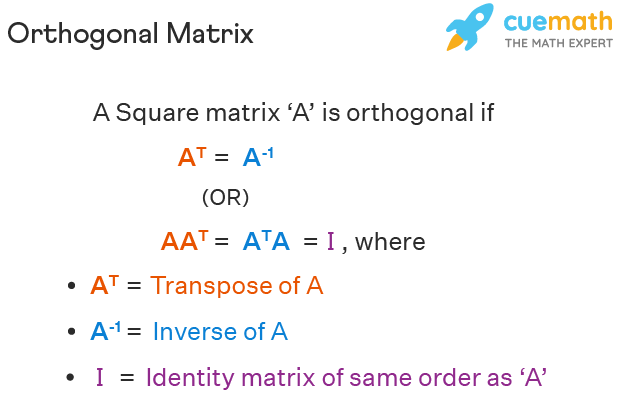

#### In orthogonal matrices, orthonormal vectors (Perpendicular to each other and having L2 norm = 1) make up, all the rows and all the columns <br>
1) For orthogonal matrices, $A * A^T = A^T * A = I$ .<br>
2) $A^T = A$ inverse

In [70]:
I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [71]:
column_1 = I[:,0]
column_1

array([1, 0, 0])

In [72]:
column_2 = I[:,1]
column_2

array([0, 1, 0])

In [73]:
column_3 = I[:,2]
column_3

array([0, 0, 1])

In [74]:
np.dot(column_1, column_2)

0

In [75]:
np.dot(column_1, column_3)

0

In [76]:
np.dot(column_2, column_3)

0

We can use the `np.linalg.norm()` method from earlier in the notebook to demonstrate that each column of $I_3$ has unit norm: 

In [77]:
np.linalg.norm(column_1)

1.0

In [78]:
np.linalg.norm(column_2)

1.0

In [79]:
np.linalg.norm(column_3)

1.0

Since the matrix $I_3$ has mutually orthogonal columns and each column has unit norm, the column vectors of $I_3$ are *orthonormal*. Since $I_3^T = I_3$, this means that the *rows* of $I_3$ must also be orthonormal. 

Since the columns and rows of $I_3$ are orthonormal, $I_3$ is an *orthogonal matrix*.

#### Exercise: Prove [[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3, 2/3, -2/3]] is an orthogonal matrix.

In [81]:
K = torch.tensor([[2/3, 1/3, 2/3], [-2/3, 2/3, 1/3], [1/3, 2/3, -2/3]])
K

tensor([[ 0.6667,  0.3333,  0.6667],
        [-0.6667,  0.6667,  0.3333],
        [ 0.3333,  0.6667, -0.6667]])

In [82]:
Kcol_1 = K[:,0]
Kcol_1

tensor([ 0.6667, -0.6667,  0.3333])

In [83]:
Kcol_2 = K[:,1]
Kcol_2

tensor([0.3333, 0.6667, 0.6667])

In [84]:
Kcol_3 = K[:,2]
Kcol_3

tensor([ 0.6667,  0.3333, -0.6667])

In [85]:
torch.dot(Kcol_1, Kcol_2)

tensor(0.)

In [86]:
torch.dot(Kcol_1, Kcol_3)

tensor(0.)

In [87]:
torch.dot(Kcol_2, Kcol_3)

tensor(0.)

We've now determined that the columns of $K$ are orthogonal.

In [88]:
torch.norm(Kcol_1)

tensor(1.)

In [89]:
torch.norm(Kcol_2)

tensor(1.)

In [90]:
torch.norm(Kcol_3)

tensor(1.)

We've now determined that, in addition to being orthogonal, the columns of $K$ have unit norm, therefore they are orthonormal. 

To ensure that $K$ is an orthogonal matrix, we would need to show that not only does it have orthonormal columns but it has orthonormal rows are as well. Since $K^T \neq K$, we can't prove this quite as straightforwardly as we did with $I_3$. 

One approach would be to repeat the steps we used to determine that $K$ has orthogonal columns with all of the matrix's rows (please feel free to do so). Alternatively, we can use an orthogonal matrix-specific equation from the slides, $A^TA = I$, to demonstrate that $K$ is orthogonal in a single line of code: 

In [91]:
torch.matmul(K.T, K)

tensor([[ 1.0000e+00, -3.3114e-09,  3.3114e-09],
        [-3.3114e-09,  1.0000e+00,  6.6227e-09],
        [ 3.3114e-09,  6.6227e-09,  1.0000e+00]])

Notwithstanding rounding errors that we can safely ignore, this confirms that $K^TK = I$ and therefore $K$ is an orthogonal matrix. 

### The Trace Operator

#### Denoted as Tr(A). It is simply the sum of the elements of the main diagonal.

In [94]:
X = np.array([[3, 15], [5, 20]])
X

array([[ 3, 15],
       [ 5, 20]])

In [95]:
3 + 20

23

In [96]:
np.trace(X)

23

#### Some useful properties of Trace
1) Tr($A$) = Tr($A^T$)<br>
2) For square matrices A, B and C. Tr(ABC) = Tr(BCA) = Tr(CAB)<br>
3) The Frobenius norm of A = $\sqrt {Tr(AA^T)}$

In [111]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [112]:
np.trace(X) == np.trace(X.T)

True

In [113]:
Y = np.array([[5, 6], [7, 8]])
Y

array([[5, 6],
       [7, 8]])

In [115]:
Z = np.array([[2, 4], [6, 8]])
Z

array([[2, 4],
       [6, 8]])

In [116]:
np.trace(np.dot(np.dot(X,Y), Z))

742

In [117]:
np.trace(np.dot(np.dot(Z,Y), X))

742

In [118]:
np.trace(np.dot(np.dot(Y,X), Z))

742

In [97]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [108]:
np.linalg.norm(X) # same function as for vector L2 norm

5.477225575051661

In [109]:
np.trace(np.dot(X, X.T)) ** 0.5

5.477225575051661

In [110]:
np.linalg.norm(X)  == np.trace(np.dot(X, X.T)) ** 0.5

True